<a href="https://colab.research.google.com/github/elliekim9881/AIFFEL_Quest/blob/master/CR5_deepL/deepLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10. 딥러닝 프로젝트
## 10-2 보스턴 주택 가격 예측 모델

In [41]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 [==============================] - 0s 0us/step
404
102


In [43]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
import numpy as np
mean = np.mean(train_data, axis = 0)
std = np.std(train_data, axis = 0)

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std


In [44]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = Sequential()
model.add(Dense(units=52, activation='relu', input_shape=(train_data.shape[1], )))
model.add(Dense(39, activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mse', metrics = 'mae')

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 52)                728       
                                                                 
 dense_12 (Dense)            (None, 39)                2067      
                                                                 
 dense_13 (Dense)            (None, 26)                1040      
                                                                 
 dense_14 (Dense)            (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [45]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data,train_labels, epochs=60, batch_size=32, validation_split=0.25)

Epoch 1/60
10/10 [==============================] - 1s 35ms/step - loss: 538.7980 - mae: 21.4634 - val_loss: 664.0986 - val_mae: 23.7051
Epoch 2/60
10/10 [==============================] - 0s 8ms/step - loss: 515.4992 - mae: 20.8987 - val_loss: 631.6085 - val_mae: 23.0091
Epoch 3/60
10/10 [==============================] - 0s 8ms/step - loss: 481.4442 - mae: 20.0365 - val_loss: 580.6954 - val_mae: 21.8779
Epoch 4/60
10/10 [==============================] - 0s 9ms/step - loss: 426.3798 - mae: 18.6358 - val_loss: 502.4515 - val_mae: 20.0693
Epoch 5/60
10/10 [==============================] - 0s 10ms/step - loss: 346.7123 - mae: 16.4057 - val_loss: 386.2784 - val_mae: 17.1208
Epoch 6/60
10/10 [==============================] - 0s 9ms/step - loss: 241.5725 - mae: 13.1565 - val_loss: 244.5438 - val_mae: 12.9266
Epoch 7/60
10/10 [==============================] - 0s 11ms/step - loss: 135.5668 - mae: 9.4093 - val_loss: 135.1138 - val_mae: 8.9849
Epoch 8/60
10/10 [=============================

<ipython-input-46-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


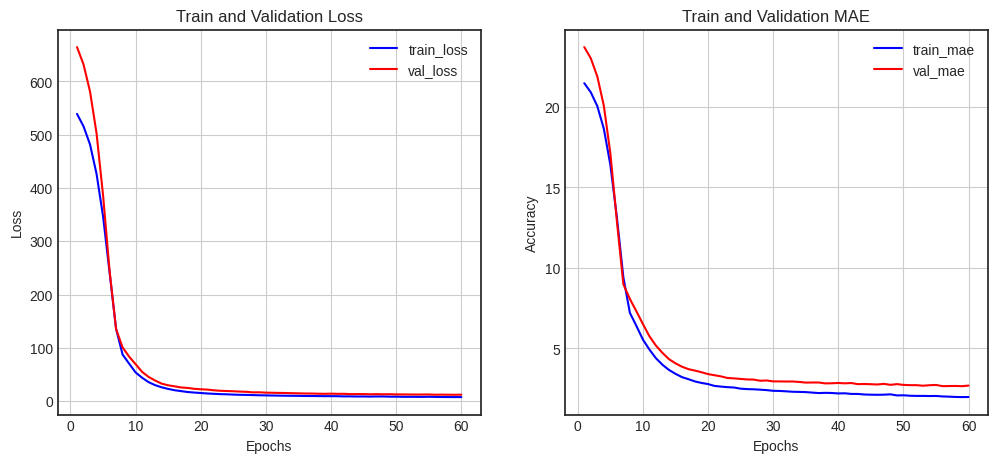

In [46]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

## 10-3 Reuters 딥러닝 모델


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [21]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data_full, train_labels_full), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, x_val, y_train, y_val = train_test_split(train_data_full, train_labels_full,
                                                  test_size=0.25,
                                                  random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(x_val))
print(len(test_data))
print(len(set(y_train)))

6736
2246
2246
46


In [22]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))  #크기가 (len(data), dimension)이고 모든 원소가 0인 행렬을 만든다.
  for i, data in enumerate(data):
    results[i, data] = 1.  #results[i]에서 특정 인덱스의 위치를 1로 만든다.
  return results

train_data = one_hot_encoding(train_data)
x_val = one_hot_encoding(x_val)
test_data = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
test_labels = to_categorical(test_labels)

In [23]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                640064    
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 46)                2990      
                                                      

In [25]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(train_data,
         y_train,
         epochs=20,
         batch_size=512,
         validation_data=(x_val, y_val),
         callbacks=[check_point_cb, early_stopping_cb])


Epoch 1/20
14/14 [==============================] - 2s 95ms/step - loss: 3.1397 - accuracy: 0.3236 - val_loss: 3.4643 - val_accuracy: 0.6144
Epoch 2/20
14/14 [==============================] - 1s 76ms/step - loss: 2.0352 - accuracy: 0.6186 - val_loss: 3.1661 - val_accuracy: 0.6549
Epoch 3/20
14/14 [==============================] - 1s 76ms/step - loss: 1.5865 - accuracy: 0.7141 - val_loss: 2.8952 - val_accuracy: 0.6799
Epoch 4/20
14/14 [==============================] - 1s 85ms/step - loss: 1.2712 - accuracy: 0.7528 - val_loss: 2.7055 - val_accuracy: 0.6857
Epoch 5/20
14/14 [==============================] - 1s 88ms/step - loss: 1.0553 - accuracy: 0.7950 - val_loss: 2.4671 - val_accuracy: 0.6941
Epoch 6/20
14/14 [==============================] - 1s 110ms/step - loss: 0.8972 - accuracy: 0.8076 - val_loss: 2.3340 - val_accuracy: 0.6995
Epoch 7/20
14/14 [==============================] - 2s 124ms/step - loss: 0.7726 - accuracy: 0.8281 - val_loss: 2.1629 - val_accuracy: 0.7039
Epoch 8/20


<ipython-input-26-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


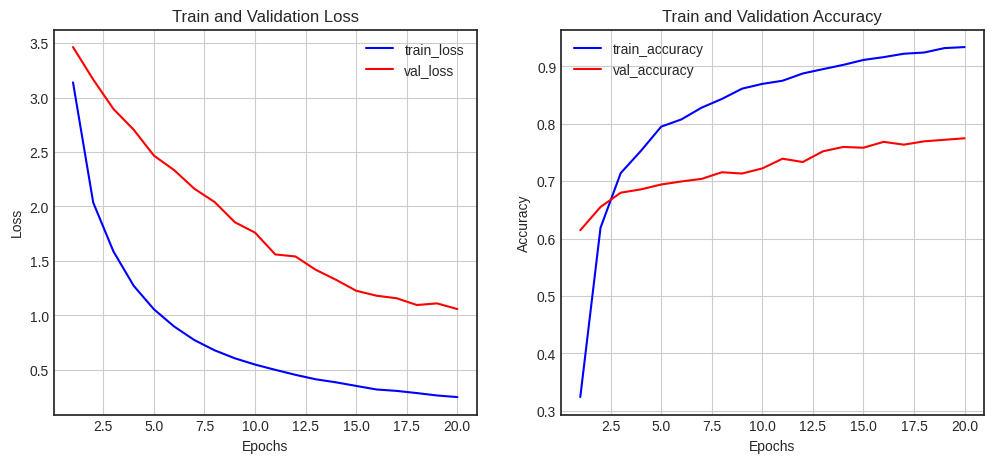

In [26]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [27]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
results = model.evaluate(test_data, test_labels)

71/71 [==============================] - 0s 5ms/step - loss: 1.0518 - accuracy: 0.7752


## 10-4 CIFAR10 딥러닝 모델

In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import layers, models

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [29]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                 test_size=0.2)

print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [30]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-31-6d8a43ba86bc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


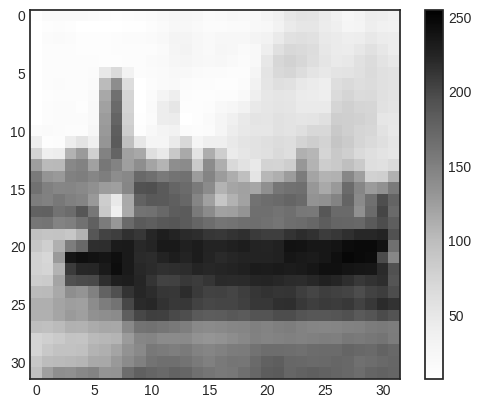

In [31]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [32]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [33]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [34]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [35]:
model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Dense(2048))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='Adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 2048)              6293504   
                                                                 
 batch_normalization_5 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 2048)              0         
                                                                 
 dropout_8 (Dropout)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_6 (Batc  (None, 1024)             4096      
 hNormalization)                                      

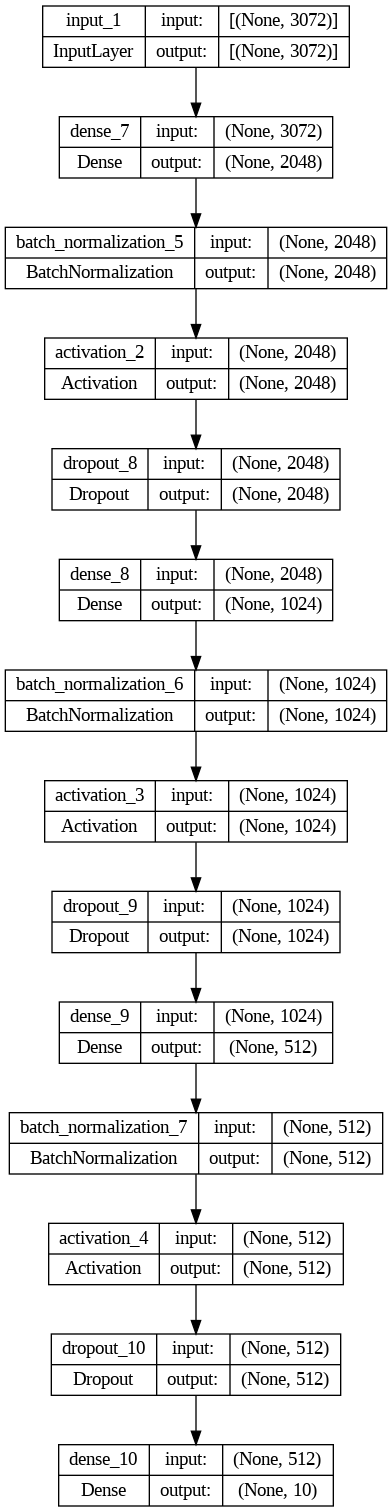

In [37]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

In [38]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=50, monitor='val_loss', restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=500,
                    batch_size=500,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/500
80/80 [==============================] - 48s 575ms/step - loss: 1.8797 - accuracy: 0.3450 - val_loss: 2.3835 - val_accuracy: 0.2864
Epoch 2/500
80/80 [==============================] - 41s 513ms/step - loss: 1.5792 - accuracy: 0.4350 - val_loss: 2.4147 - val_accuracy: 0.2558
Epoch 3/500
80/80 [==============================] - 45s 562ms/step - loss: 1.4613 - accuracy: 0.4782 - val_loss: 1.8366 - val_accuracy: 0.3218
Epoch 4/500
80/80 [==============================] - 41s 512ms/step - loss: 1.3693 - accuracy: 0.5109 - val_loss: 1.9656 - val_accuracy: 0.3435
Epoch 5/500
80/80 [==============================] - 43s 532ms/step - loss: 1.3044 - accuracy: 0.5319 - val_loss: 1.9761 - val_accuracy: 0.3167
Epoch 6/500
80/80 [==============================] - 41s 518ms/step - loss: 1.2486 - accuracy: 0.5533 - val_loss: 1.6577 - val_accuracy: 0.4199
Epoch 7/500
80/80 [==============================] - 43s 541ms/step - loss: 1.1952 - accuracy: 0.5720 - val_loss: 1.5832 - val_accuracy:

<ipython-input-39-81ca1211f9e3>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


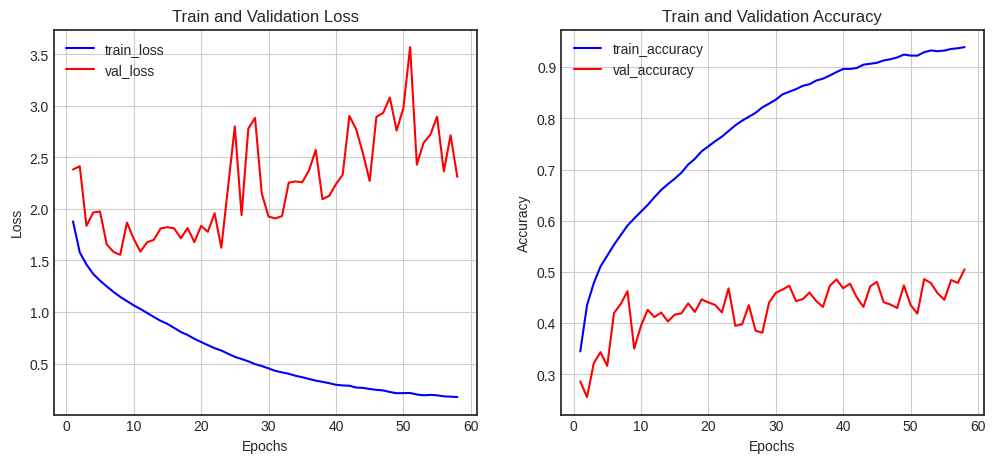

In [39]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [40]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 19ms/step - loss: 1.5466 - accuracy: 0.4572


[1.5466301441192627, 0.45719999074935913]